# **Praktikum 2**

**Konsep K-Means untuk klasterisasi data**

Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #atur pengaturan default agar visualisasi lebih rapi tanpa konfigurasi yang rumit
import numpy as np

Pengantar k-Means

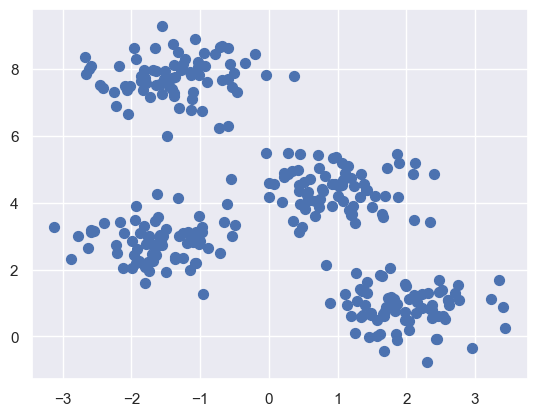

In [2]:
from sklearn.datasets import make_blobs #make_blobs untuk membuat dataset berdasarkan pusat tertentu dan sebaran
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)#Membuat dataset
plt.scatter(X[:, 0], X[:, 1], s=50);#membuat scatter plot

In [3]:
from sklearn.cluster import KMeans#library untuk clustering dengan K-Means
kmeans = KMeans(n_clusters=4)#membuat model kK-means dengan membaginya menjadi 4 kluster
kmeans.fit(X)#melatih model 
y_kmeans = kmeans.predict(X)#memprediksi cluster 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


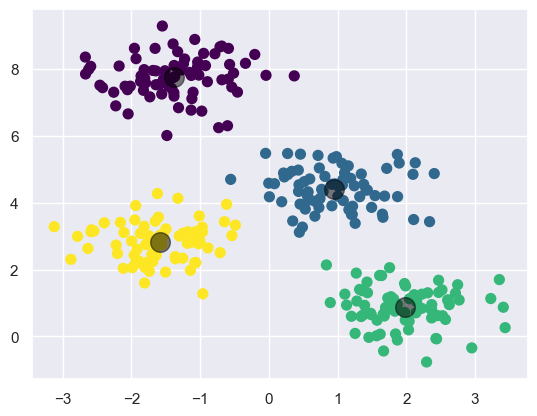

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')#membuat scatter plot dengan kolom pertama sebeagi niali sumbu x dan kolom kedua sebagai sumbu y 

centers = kmeans.cluster_centers_#ambil koordinat pusat 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)#menggambar centroid pada plot

Algoritma Expectation-Macimization

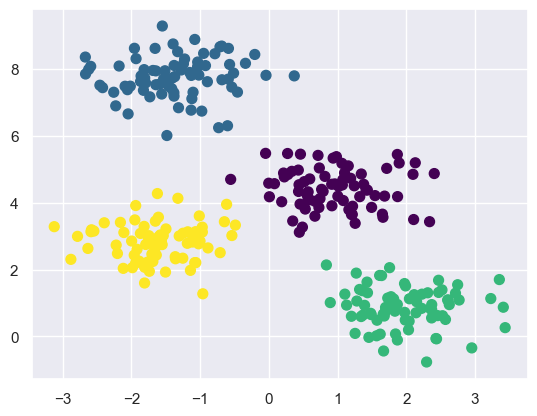

In [5]:
from sklearn.metrics import pairwise_distances_argmin#untuk mencari cluster yang paling dekat untuk tiap titik data

# X: Data yang akan di-cluster.
# n_clusters: Jumlah cluster yang ingin ditemukan.
# rseed: Seed untuk menghasilkan angka acak, yang memungkinkan hasil yang dapat direproduksi.
def find_clusters(X, n_clusters, rseed=2):#menghasilkan angka acak
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)#menentukan cluster mana yang paling dekat dengan setiap titik data dalam X berdasarkan jarak Euclidean. 
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])#menghitung pusat (centroid) baru dari masing-masing cluster dengan mengambil rata-rata dari semua titik data yang termasuk dalam cluster yang sama
        
        # 2c. cek konvergensi
        #memeriksa apakah pusat cluster telah konvergen (yaitu, apakah pusat cluster baru sama dengan pusat cluster sebelumnya). Jika pusat cluster telah konvergen, maka kondisi if terpenuhi, dan loop berhenti.
        if np.all(centers == new_centers):
            break
        centers = new_centers # pusat cluster diperbarui dengan pusat yang baru
    
    return centers, labels

#Dalam baris ini memanggil fungsi find_clusters dengan data X dan jumlah cluster 4. 
# Hasilnya adalah dua variabel:
# centers: Pusat (centroid) cluster yang telah ditemukan.
# labels: Label cluster yang menunjukkan cluster mana yang ditempati oleh setiap titik data dalam X.
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');#membuat scatter plot

Perubahan Random

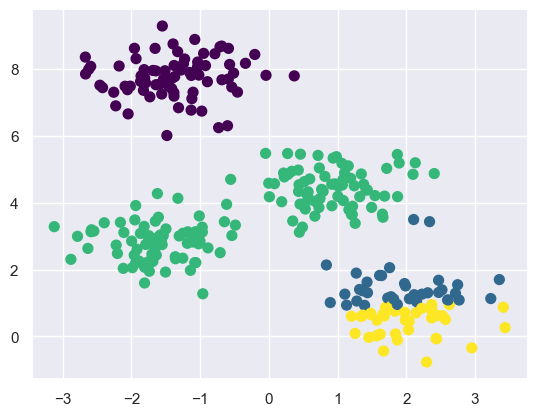

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)#menggunakan seed acak untuk menghasilkan angka acak dengan hasil yang dapat direproduksi
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Optimalisasi Jumlah Klaster

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


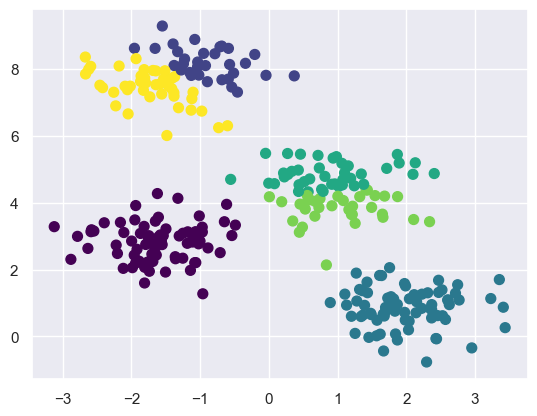

In [7]:
#menggunakan Kmean dengan 6 cluster dan untuk melatih model kmeans sekaligus memprediksi label cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Batas Klaster yang Tidak Selalu Linear

In [8]:
from sklearn.datasets import make_moons#untuk membuat dataset sintetis 
X, y = make_moons(200, noise=.05, random_state=0)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


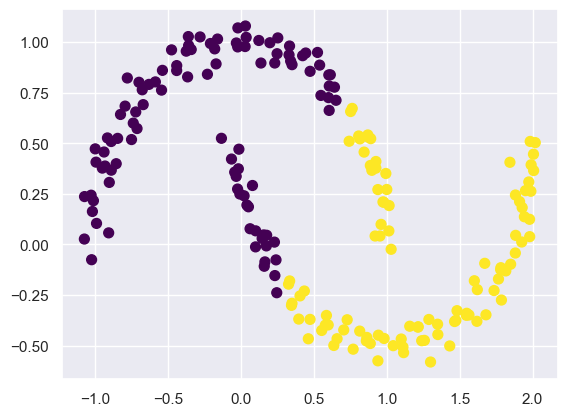

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


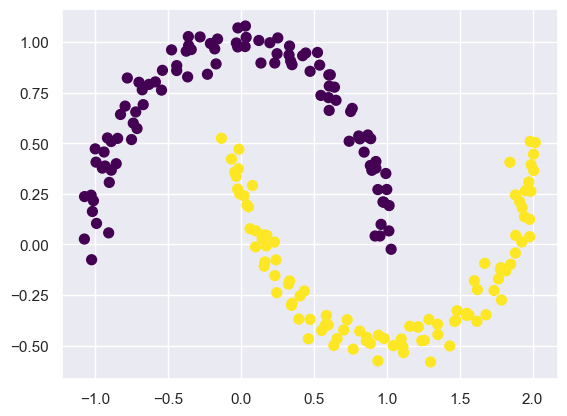

In [11]:
from sklearn.cluster import SpectralClustering#merupakan salah satu teknik clustering yang digunkan untuk mengelompokkan data
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')#membuat model spectralclusterring
labels = model.fit_predict(X)#melakukan clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');#make scatter plot

**Contoh Kasus 1: Karakter Angka**

In [12]:
from sklearn.datasets import load_digits#memuat dataset "Digits" 
digits = load_digits()#memuat dataset "Digits" ke dalam variabel digits.
digits.data.shape#akses untuk ambil bentuk dari dataset

(1797, 64)

In [13]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)#buat objek K-Means dengan membagi menjadi 1 cluster
clusters = kmeans.fit_predict(digits.data)#do clustering
kmeans.cluster_centers_.shape#akses pusat centroid dan mengambil bentuk 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

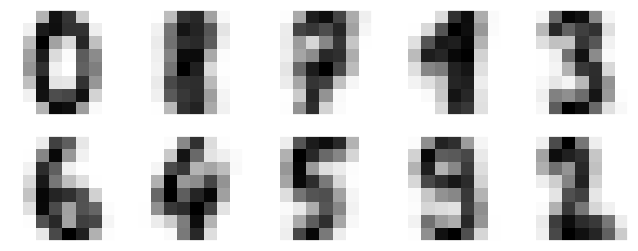

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))#buat gambar
centers = kmeans.cluster_centers_.reshape(10, 8, 8)#mengambil pusat-pusat cluster dari objek K-Means 

#melakukan iterasi melalui masing-masing subplot (axi) dan pusat-pusat cluster (center) menggunakan zip. Dalam konteks ini, setiap subplot akan menampilkan satu pusat cluster yang merepresentasikan digit.
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [15]:
from scipy.stats import mode#digunakan untuk menghitung mode dari sebuah dataset, yaitu nilai yang paling sering muncul dalam dataset tersebut.

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)#membuat mask (masking) yang akan mengidentifikasi elemen-elemen dalam array clusters
    labels[mask] = mode(digits.target[mask])[0]#mengambil label sebenarnya dari data yang masuk ke dalam cluster dan menghitung mode dari label tsb

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18540\1054570171.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

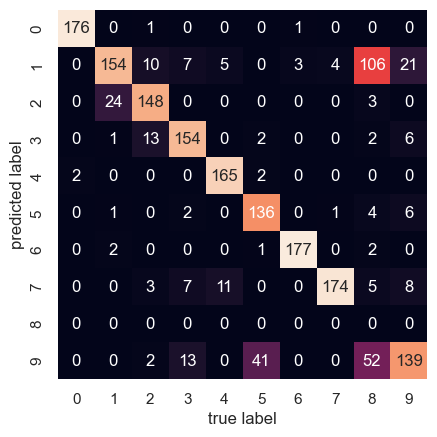

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [18]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18540\4118165493.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.9415692821368948

**Studi Kasus 2: Kompresi Citra**

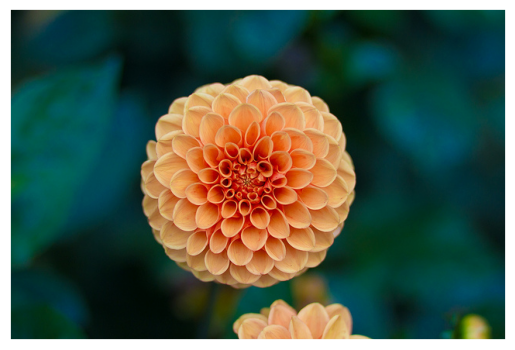

In [19]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [20]:
flower.shape

(427, 640, 3)

In [21]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

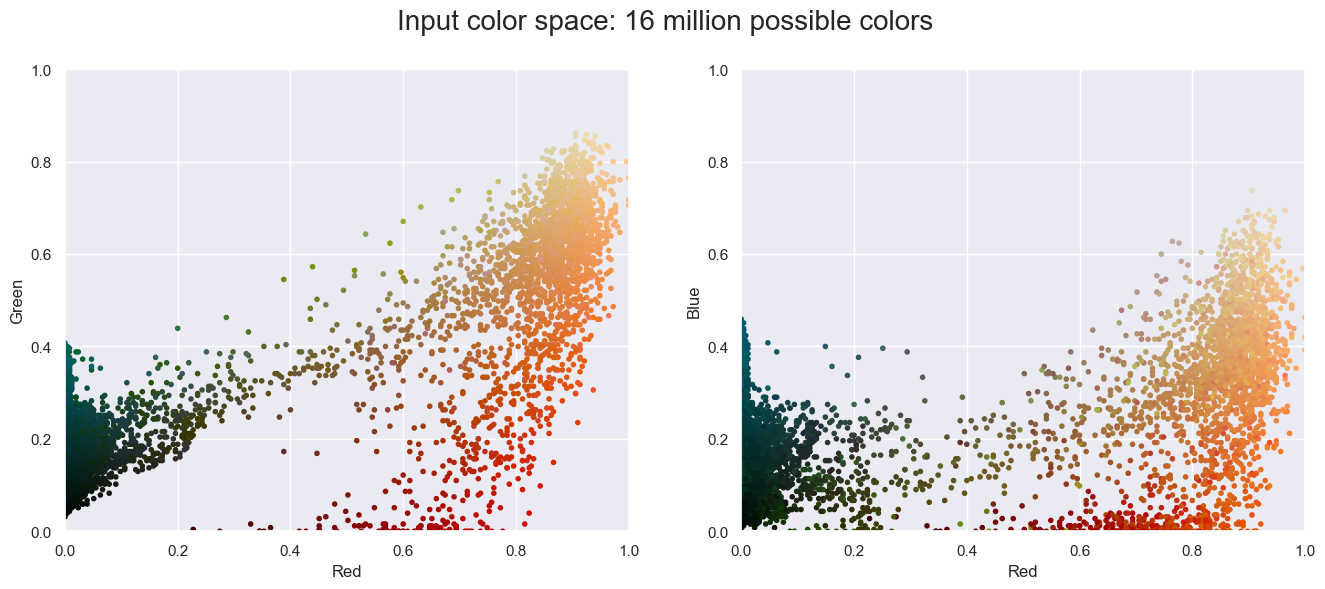

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

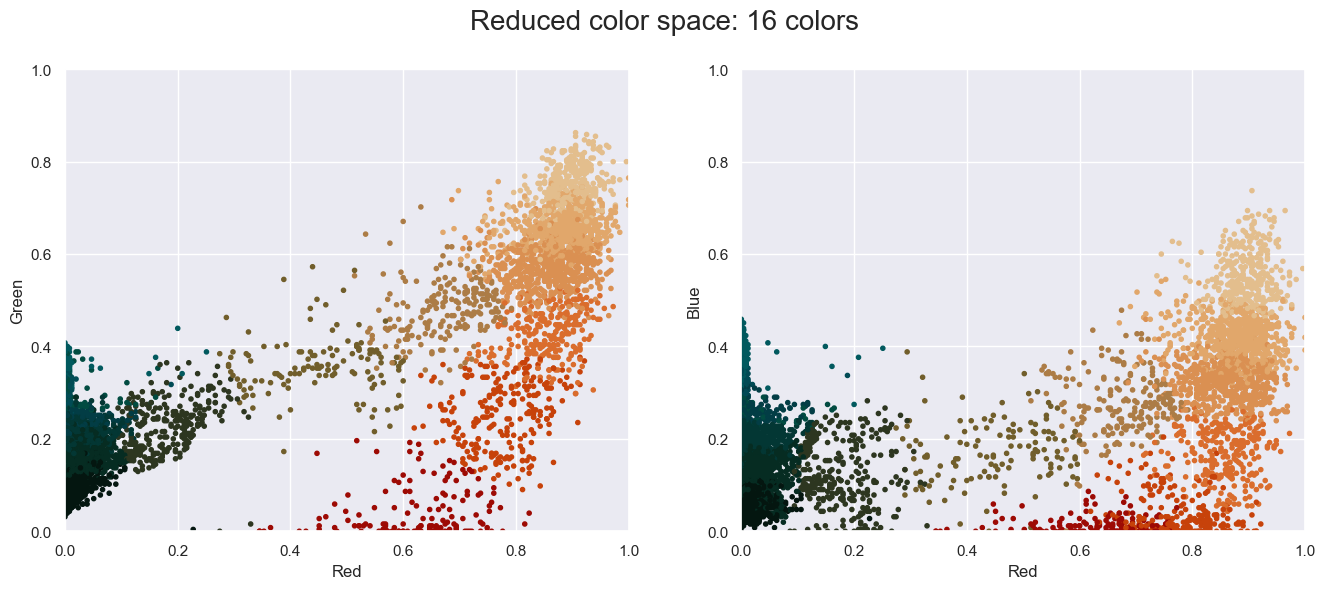

In [24]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

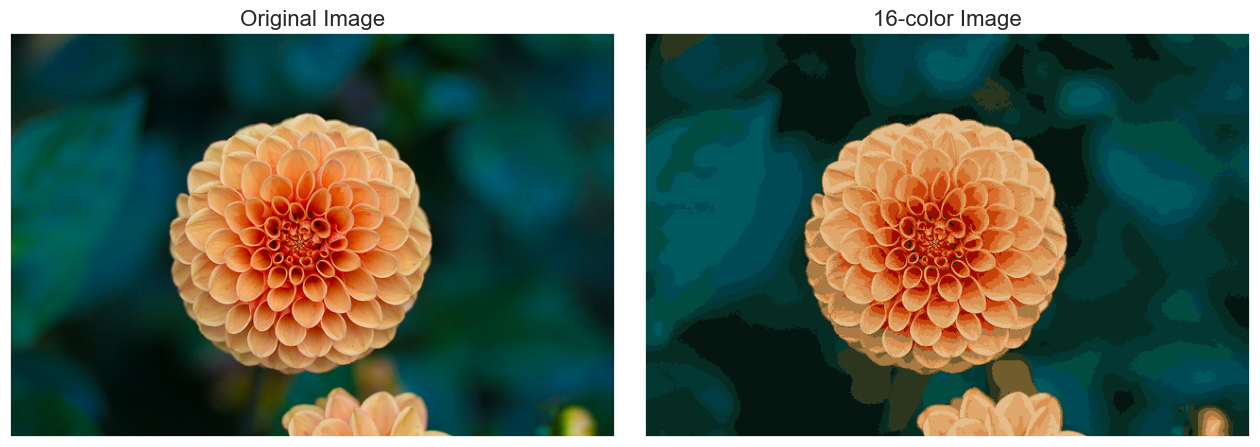

In [25]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);